In [1]:
from PIL import Image, ImageDraw, ImageFont

class TextFont:
    '''
    This class is used to represent font family and font size for text.
    '''
    def __init__(self, font_family="simhei.ttf", font_size = 100):
        self.__font_family = font_family
        self.__font_size = font_size
    
    @property
    def font_family(self):
        return self.__font_family
    
    @font_family.setter
    def font_family(self, font_family):
        self.__font_family = font_family
    
    @property
    def font_size(self):
        return self.__font_size
    
    @font_size.setter
    def font_size(self, font_size):
        self.__font_size = font_size
    
    @property
    def font(self):
        return ImageFont.truetype(self.font_family, self.font_size)    

class WaterMark:
    '''
    This class is used to add water mark to a image
    '''
    
    def __init__(self):
        self.__font = TextFont()
        self.__font_size_adaptive = True
        self.__watermark_text = None
        self.__fill_rgba = (50, 50, 50, 50)
        self.__output_file_name = None
        
    def set_font_family(self, font_family):
        '''
        This method is used to set font family
        '''
        self.__font.font_family = font_family
        
    def set_font_size(self, font_size = None, adaptive = True):
        '''
        This method is used to set font size
        font_size : font size
        adaptive : if to calculate font size to meet the size of image
              True : calculate font size according to image size
              False : use the input or font size saved in this class
        '''
        if font_size is not None:
            self.__font.font_size = max(font_size, 1)
        self.__font_size_adaptive = adaptive
    
    def set_fill_rgba(self, fill_rgba = (50, 50, 50, 50)):
        '''
        Set color including R,G,B,A of the water mark
        '''
        self.__fill_rgba = fill_rgba
        
    def set_output_image_name(self, output_img_name):
        '''
        Set ouput file name
        '''
        self.__output_file_name = output_img_name
    
    def add_text_to_image(self, image_path, text):
        '''
        Add water mark to the input image.
        image_path : path of image to add water mark
        text : text added to image
        '''
        # Get Image object whose format is RGBA created by input image_path
        img_to_process_rgba = self.__get_rgba_image(image_path)
        if img_to_process_rgba is None:
            return None
        font = self.__get_font(img_to_process_rgba.size, text)
        text_overlay = self.__get_overlay(text, img_to_process_rgba.size, font.font, self.__fill_rgba)
        img_added_watermark = Image.alpha_composite(img_to_process_rgba, text_overlay)
        return img_added_watermark 
    
    def save(self, image_to_save, image_path = None):
        '''
        Save the processed image
        '''
        image_path_to_save = image_path if image_path is not None else self.__output_file_name
        if image_path_to_save is None:
            print("Fail to save file, as no output file name provided")
            return  False
        image_to_save.save(image_path_to_save)
        return True            
    
    def __get_rgba_image(self, image_path):
        try:
            with Image.open(image_path) as img_to_process:
                return img_to_process.convert("RGBA")
        except Exception as e:
            # todo : should move the error info into a log file
            print("fail to add watermark to ", image_path)
            return None
    
    def __get_font(self, image_size, text):
        font = TextFont()
        font.font_family = self.__font.font_family
        if self.__font_size_adaptive:
            font.font_size = self.__get_font_size(image_size, text)
        else:
            font.font_size = self.__font.font_size
        return font
    
    def __get_font_size(self, image_size, text):
        text_width = len(text)
        return int(min(image_size[0]/text_width, image_size[1], 100))
    
    def __get_overlay(self, text, img_size, font, fill):
        text_overlay = Image.new("RGBA", img_size, (255, 255, 255, 0))
        text_draw = ImageDraw.Draw(text_overlay)
        
        text_width, text_height = text_draw.textsize(text, font = font)
        for pos_x in range(0, img_size[0], text_width):
            for pos_y in range(0, img_size[1], text_height):
                text_draw.text((pos_x, pos_y), text, font = font, fill = fill)
        return text_overlay

In [11]:
def main():
    water_mark = WaterMark()
    water_mark.set_font_size(10, False)
    water_mark.set_fill_rgba((255,255,255,100))
    img_processed = water_mark.add_text_to_image("./lena.jpg",'版权所有：Junnix')
    water_mark.save(img_processed, "lena_test.jpg")

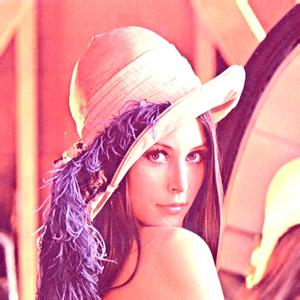

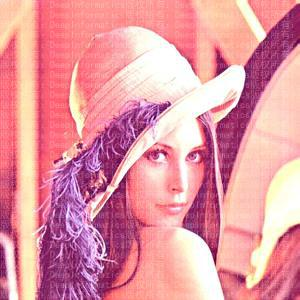

In [17]:
    from IPython import display
    display.display(display.Image("lena.jpg"))
    display.display(display.Image("lena_test.jpg"))

In [7]:
if __name__== "__main__":
    main()